In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv(r'C:\Users\user\Desktop\sungyeh\python\2019-03-26\IrisCompleted.csv')

In [4]:
iris.head()

,Sepal_L,Sepal_W,Petal_L,Petal_W,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


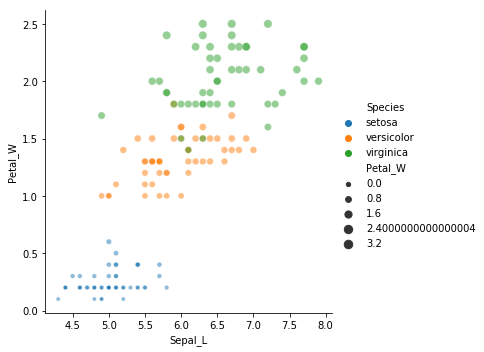

In [11]:
sns.relplot(x="Sepal_L", y="Petal_W", data=iris,hue="Species",alpha=0.5,size="Petal_W");


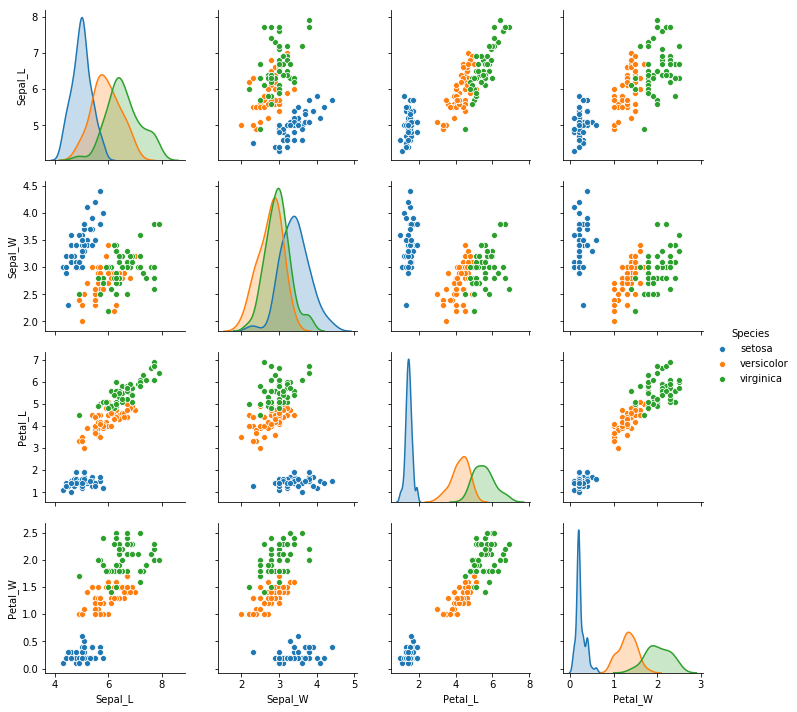

In [12]:
sns.pairplot(iris,hue="Species");

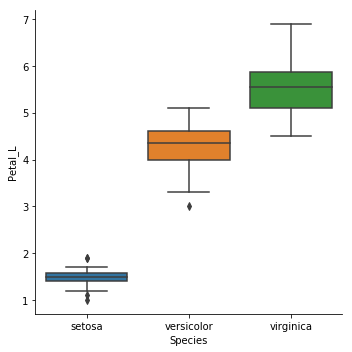

In [13]:
sns.catplot(x="Species", y="Petal_L", kind="box", data=iris);

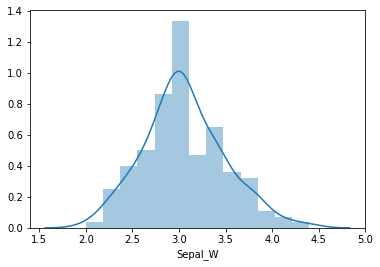

In [14]:
sns.distplot(iris['Sepal_W'])

In [15]:
from sklearn import cluster, datasets, metrics

In [20]:
iris_X = iris.iloc[:,:4]

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 6).fit(iris_X)
cluster_labels = kmeans_fit.labels_

# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.36483400396700366


In [21]:
iris['pred']=cluster_labels

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


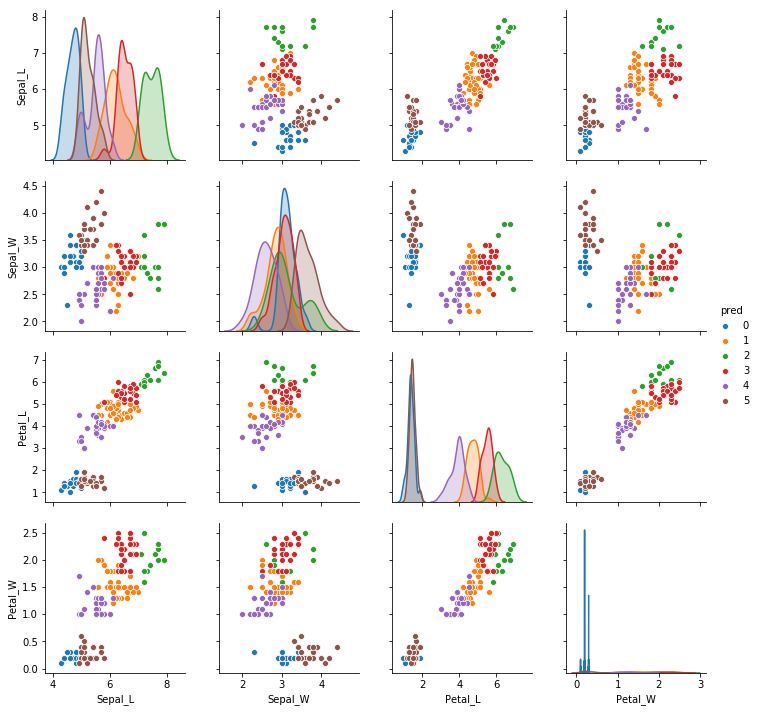

In [22]:
sns.pairplot(iris,hue='pred',vars=['Sepal_L','Sepal_W','Petal_L','Petal_W']);

In [23]:
Buying=pd.read_csv(r'C:\Users\user\Desktop\sungyeh\python\2019-03-26\RFM_Sample.csv')

In [26]:
Buying.head()
Buying_data=Buying[['R','F','M']]

[0 2 1 1 1 0 1 0 2 2 0 2 2 0 2 0 2 2 0 0 2 1 2 2 2 2 0 1 0 0 0 1 1 2 2 2 1
 1 1 2 2 2 2 2 2 2 2 1 2 0 1 1 2 2 1 2 2 2 2 1 2 2 1 2 2 2 2 2 1 1 2 0 0 0
 0 2 0 1 2 2 2 2 1 0 1 0 2 2 0 0 0 0 2 0 0 0 2 0 0 1 2 1 1 2 2 1 2 1 1 2 0
 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 0 2 1 0 2 0 1 2 2 1 0 2 1 2 2 1 0 1 2 0 2 2
 0 1 0 1 2 1 1 0]


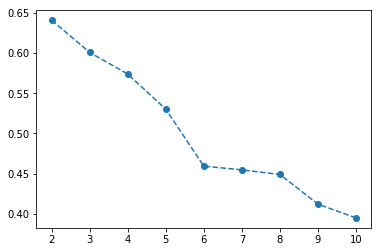

In [27]:
from sklearn import preprocessing
nb=preprocessing.scale(Buying_data)
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(nb)
cluster_labels = kmeans_fit.labels_
print(cluster_labels)
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(nb)
    sil_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(nb, sil_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.plot(ks, silhouette_avgs,'o--')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


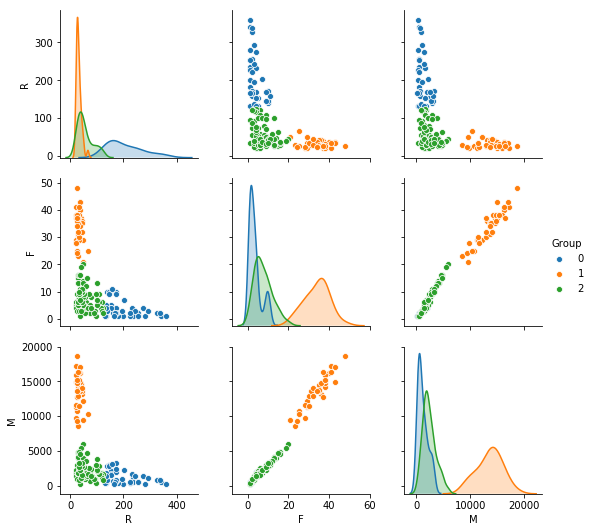

In [28]:
Buying['Group']=cluster_labels
sns.pairplot(Buying,hue='Group',vars=['R','F','M']);